

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [2]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = yesterday
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-17'] ['2016-12-16'] ['2016-12-11']
['2016-12-17']
'2016-12-17'


### get url

In [3]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-17'


In [4]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [5]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [7]:
df = pd.read_csv(url)

In [8]:
df.shape

(84, 16)

#### wow, 5 days > 1000 reports

In [9]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6638625,12/17/2016 10:16:20 PM,NaN,12/17/2016 10:19:27 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sidewalk_structure - Not_Offensive,Intersection of SANCHEZ ST and 19TH ST,8,Dolores Heights,"(37.7595573310853, -122.430420425099)",Voice In,NaN
1,6638553,12/17/2016 08:29:00 PM,NaN,12/17/2016 08:52:45 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_other - Not_Offensive,"99 MISSOURI ST, SAN FRANCISCO, CA, 94107",10,Potrero Hill,"(37.765507848783, -122.396582006941)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585610813da153f1b6e7f708/report.jpg
2,6638543,12/17/2016 08:23:33 PM,NaN,12/17/2016 08:23:33 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of HYDE ST and SUTTER ST,3,Lower Nob Hill,"(37.7881778933007, -122.416827051351)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58560f3a3da153f1b6e7f6fc/report.jpg


In [10]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [11]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6638625,2016-12-17 22:16:20,NaT,2016-12-17 22:19:27,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sidewalk_structure - Not_Offensive,Intersection of SANCHEZ ST and 19TH ST,8,Dolores Heights,"(37.7595573310853, -122.430420425099)",Voice In,NaN
1,6638553,2016-12-17 20:29:00,NaT,2016-12-17 20:52:45,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_other - Not_Offensive,"99 MISSOURI ST, SAN FRANCISCO, CA, 94107",10,Potrero Hill,"(37.765507848783, -122.396582006941)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585610813da153f1b6e7f708/report.jpg
2,6638543,2016-12-17 20:23:33,NaT,2016-12-17 20:23:33,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of HYDE ST and SUTTER ST,3,Lower Nob Hill,"(37.7881778933007, -122.416827051351)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58560f3a3da153f1b6e7f6fc/report.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=17.0, right=17.0
  'left=%s, right=%s') % (left, right))


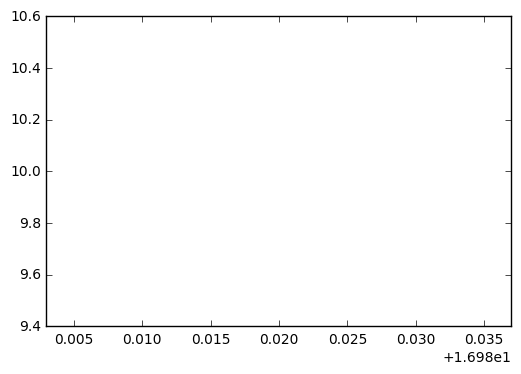

In [12]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=17.0, right=17.0
  'left=%s, right=%s') % (left, right))


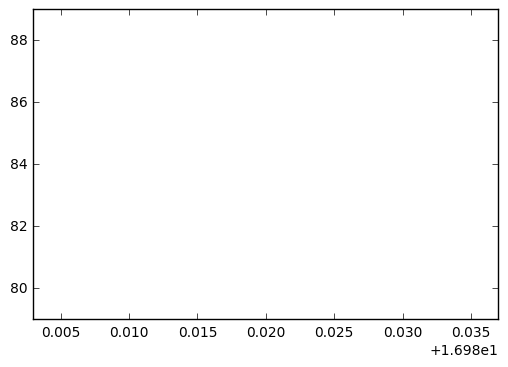

In [13]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5.0, right=5.0
  'left=%s, right=%s') % (left, right))


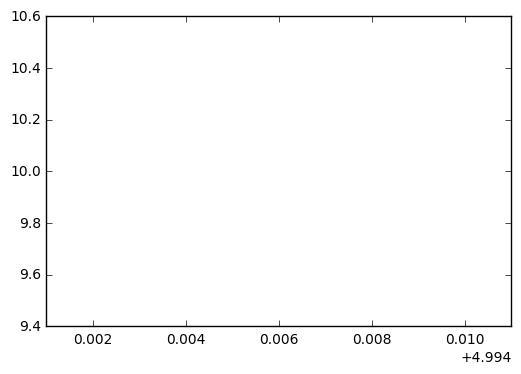

In [14]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [15]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [16]:

df['Request Details'].value_counts()


Other_enter_additional_details_below - Offensive    10
Building_commercial - Not_Offensive                  8
Sidewalk_in_front_of_property - Not_Offensive        7
Mail_box - Not_Offensive                             7
Fire_hydrant - Not_Offensive                         7
Building_other - Not_Offensive                       6
Pole - Not_Offensive                                 5
Signal_box - Not_Offensive                           5
Parking_meter - Not_Offensive                        5
Transit_Shelter_Platform - Not_Offensive             4
Fire_Police_Callbox - Not_Offensive                  3
City_receptacle - Not_Offensive                      3
Sidewalk_structure - Not_Offensive                   3
Transit_Shelter_Platform - Offensive                 2
Building_other - Offensive                           2
News_rack - Not_Offensive                            2
Street - Not_Offensive                               1
Fire_hydrant - Offensive                             1
Pole - Off

In [17]:
df['Supervisor District'].value_counts().sort_index()



1      2
2      1
3     20
4      2
5      3
6     19
7      1
8     19
9     13
10     3
11     1
Name: Supervisor District, dtype: int64

In [18]:
df.Neighborhood.value_counts()

Mission                    21
Tenderloin                 19
Duboce Triangle             6
Chinatown                   5
Financial District          4
Lower Nob Hill              3
Downtown / Union Square     3
North Beach                 3
Civic Center                3
Inner Sunset                2
Dolores Heights             2
Outer Richmond              1
Portola                     1
Inner Richmond              1
South of Market             1
Potrero Hill                1
Pacific Heights             1
Castro                      1
Central Waterfront          1
Westwood Park               1
Crocker Amazon              1
Little Hollywood            1
Outer Sunset                1
Mission Dolores             1
Name: Neighborhood, dtype: int64

In [19]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
3,6638520,2016-12-17 20:06:15,NaT,2016-12-17 20:06:15,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of 22ND ST and VALENCIA ST,8,Mission,"(37.7552947784154, -122.420964146993)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58560b303da153f1b6e7f69d/report.jpg
4,6638519,2016-12-17 20:05:51,2016-12-17 20:17:08,2016-12-17 20:17:08,Closed,Case is a Duplicate - Duplicated with case 6638520,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of 22ND ST and VALENCIA ST,8,Mission,"(37.7552947784154, -122.420964146993)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58560b173da153f1b6e7f691/report.jpg
27,6637773,2016-12-17 13:33:05,NaT,2016-12-17 14:15:04,Open,open,DPW BSM Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"1248 POTRERO AVE, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752283249877, -122.406491317582)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5855af0a3da153f1b6e7ee84/report.jpg
51,6637396,2016-12-17 11:17:04,NaT,2016-12-17 11:24:08,Open,Open,PG and E - Streetlights Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 18TH ST and SAN CARLOS ST,9,Mission,"(37.7617892171553, -122.420128321734)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58558f273da153f1b6e7e9fe/photo_20161217_111540.jpg
52,6637394,2016-12-17 11:15:01,NaT,2016-12-17 11:15:01,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 18TH ST and SAN CARLOS ST,9,Mission,"(37.7617892171553, -122.420128321734)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58558eaf3da153f1b6e7e9e4/photo_20161217_111409.jpg
53,6637381,2016-12-17 11:10:57,NaT,2016-12-17 11:10:57,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 18TH ST and SAN CARLOS ST,9,Mission,"(37.7617892171553, -122.420128321734)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58558dbb3da153f1b6e7e99c/photo_20161217_111025.jpg
55,6637376,2016-12-17 11:08:16,2016-12-17 11:41:52,2016-12-17 11:41:52,Closed,Case Transferred -,311 Supervisor Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 17TH ST and MISSION ST,9,Mission,"(37.7634292697508, -122.419512595608)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58558d183da153f1b6e7e975/photo_20161217_110747.jpg
57,6637358,2016-12-17 10:54:47,NaT,2016-12-17 11:27:53,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 20TH ST and FLORIDA ST,9,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585589f23da153f1b6e7e920/photo_20161217_105325.jpg
58,6637340,2016-12-17 10:50:02,NaT,2016-12-17 11:08:15,Open,open,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"2191 MISSION ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.762003712327, -122.419064566624)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585588d63da153f1b6e7e8e6/photo_20161217_104944.jpg
59,6637332,2016-12-17 10:48:12,NaT,2016-12-17 10:48:12,Open,Open,US Postal Service Maintenance Queue,Graffiti Publ


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [20]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [21]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/58560f3a3da153f1b6e7f6fc/report.jpg
1                                                                                                  NaN
2                                                                                                  NaN
3                                                                                                  NaN
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855e6f63da153f1b6e7f4c7/report.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855e5d13da153f1b6e7f4a6/report.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855bcdc3da153f1b6e7f01d/report.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855bc253da153f1b6e7f008/report.jpg
8     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855bb593da153f1b6e7efe9/report.jpg
9     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855ba

In [22]:
print(peskin[:])

0     http://mobile311.sfgov.org/media/san_francisco/report/photos/58560f3a3da153f1b6e7f6fc/report.jpg
1                                                                                                  NaN
2                                                                                                  NaN
3                                                                                                  NaN
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855e6f63da153f1b6e7f4c7/report.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855e5d13da153f1b6e7f4a6/report.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855bcdc3da153f1b6e7f01d/report.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855bc253da153f1b6e7f008/report.jpg
8     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855bb593da153f1b6e7efe9/report.jpg
9     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855ba

# The whole City

In [23]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585610813da153f1b6e7f708/report.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58560f3a3da153f1b6e7f6fc/report.jpg
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58560b303da153f1b6e7f69d/report.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58560b173da153f1b6e7f691/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58560a463da153f1b6e7f631/report.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/5855f49d3da153f1b6e7f541/photo_20161217_182930.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5855e6f63da153f1b6e7f4c7/report.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5855e5d13da153f1b6e7f4a6/report.jpg
8                    http://mobile311.sfgov.org/media/sa

In [24]:
len(images)

68

In [25]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/585610813da153f1b6e7f708/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5855ac7e3da153f1b6e7ee2d/report.jpg


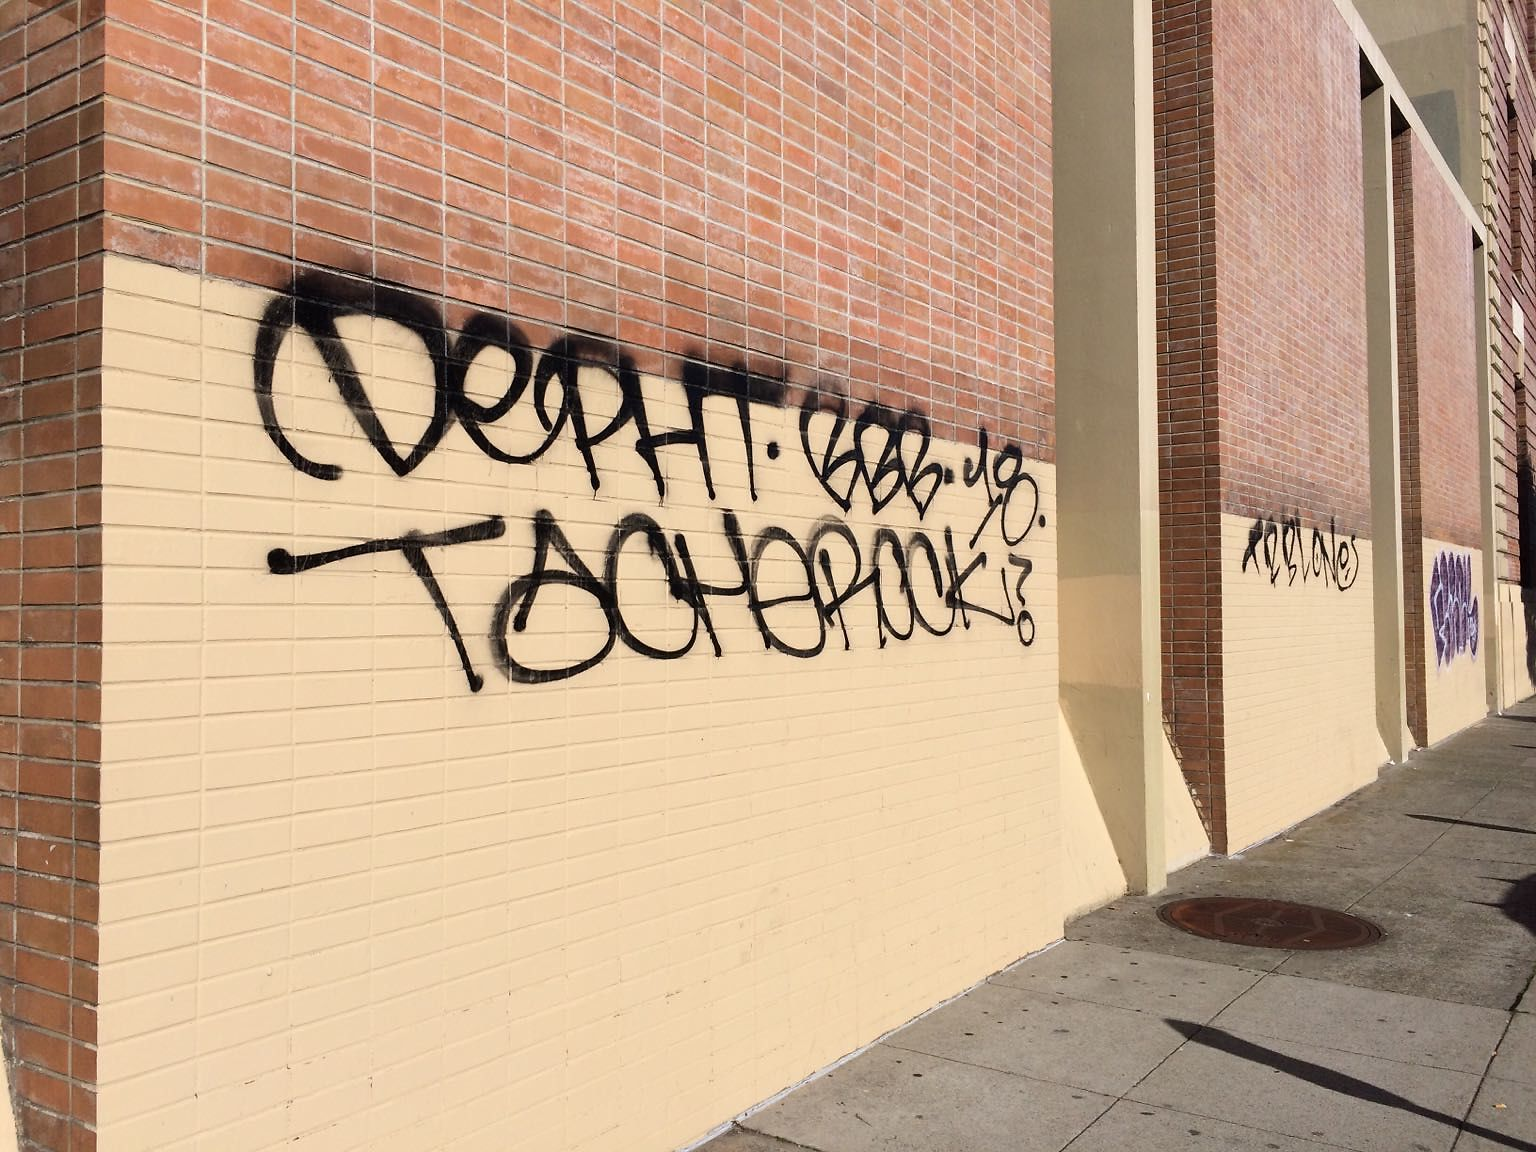

In [26]:
print(images[20])
Image(images[20])


In [27]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [28]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [29]:
!yes| bash vidCreate.sh 

--2016-12-18 16:32:20--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585610813da153f1b6e7f708/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171148 (167K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 167.14K   872KB/s    in 0.2s    

2016-12-18 16:32:20 (872 KB/s) - 'report.jpg' saved [171148/171148]

--2016-12-18 16:32:20--  http://mobile311.sfgov.org/media/san_francisco/report/photos/58560f3a3da153f1b6e7f6fc/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 94037 (92K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>]  91.83K  --.-KB/s    in 0.04s   

2016-12-18 16:32:21 (2.29 MB/s) - 'report.jpg.1' saved [94037/94037]

--2016-12-18 16:32:21--  ht

In [ ]:
!ls -la
